<a href="https://colab.research.google.com/github/nujl/Liberty-Data-Science/blob/main/5.Pokemon%20Unite%20Analysis/%5BKR%5D_Pokemon_Unite_May_Cup_VS_Aeos_Cup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections

%matplotlib inline

---
# Data

In [2]:
df_aeos = pd.read_csv("https://raw.githubusercontent.com/nujl/Liberty-Data-Science/main/5.Pokemon%20Unite%20Analysis/data/Pokemon%20Unite%20Match%20Data%20%5BSouth%20Korea%5D%20-%20Aeos%20Cup%20-%20%20%5BKR%5D%204_22%7E23.csv")

df_may = pd.read_csv("https://raw.githubusercontent.com/nujl/Liberty-Data-Science/main/5.Pokemon%20Unite%20Analysis/data/Pokemon%20Unite%20Match%20Data%20%5BSouth%20Korea%5D%20-%20May%20Cup%20-%20Top%2016%20Teams%20%5BKR%5D%205_28.csv")

ALLPOKEMONS = ['Absol',
 'Aegislash',
 'Alolan_Ninetales',
 'Azumarill',
 'Blastoise',
 'Blissey',
 'Charizard',
 'Cinderace',
 'Cramorant',
 'Crustle',
 'Decidueye',
 'Dragonite',
 'Duraludon',
 'Eldegoss',
'Espeon',
 'Garchomp',
 'Gardevoir',
 'Gengar',
 'Greedent',
 'Greninja',
 'Hoopa',
 'Lucario',
 'Machamp',
 'Mamoswine',
 'Mr._Mime',
 'Pikachu',
 'Slowbro',
 'Snorlax',
 'Sylveon',
 'Talonflame',
 'Trevenant',
 'Tsareena',
 'Venusaur',
 'Wigglytuff',
 'Zeraora']

ALLPOKEMONS_KR = ['앱솔',
 '킬가르도',
 '알로라 나인테일',
 '마릴리',
 '거북왕',
 '해피너스',
 '리자몽',
 '에이스번',
 '윽우지',
 '암팰리스',
 '모크나이퍼',
 '망나뇽',
 '두랄루돈',
 '백솜모카',
'에브이',
 '한카리아스',
 '가디안',
 '팬텀',
 '요씽리스',
 '개굴닌자',
 '후파',
 '루카리오',
 '괴력몬',
 '맘모꾸리',
 '마임맨',
 '피카츄',
 '야도란',
 '잠만보',
 '님피아',
 '파이어로',
 '대로트',
 '달코퀸',
 '이상해꽃',
 '푸크린',
 '제라오라']

In [3]:
print(df_aeos.shape)

df_aeos.head()

(32, 61)


,Team Blue,Team Red,FinalScoreBlue,FInalScoreRed,BP1,BP2,BP3,BP4,BP5,RP1,...,RP5_BI1,RP5_BI2,RP5_BI3,DRED1,DRED2,DRED3,ROTOM1,ROTOM2,ROTOM3,ZAPDOS
0,Z Crystal,두부조림,579,279,Talonflame,Alolan_Ninetales,Tsareena,Venusaur,Hoopa,Talonflame,...,Buddy Barrier,Choice Specs,Focus Band,Blue,Blue,Red,Red,Red,None,Blue
1,두부조림,Z Crystal,112,531,Tsareena,Wigglytuff,Pikachu,Talonflame,Duraludon,Talonflame,...,Buddy Barrier,Muscle Band,Focus Band,Red,Red,Red,Blue,Blue,Blue,Red
2,Persona,Eternity,927,961,Dragonite,Greedent,Lucario,Wigglytuff,Talonflame,Greedent,...,Muscle Band,Score Shield,Buddy Barrier,Red,Red,Blue,Red,Red,None,Blue
3,Eternity,Persona,905,388,Greedent,Talonflame,Lucario,Wigglytuff,Dragonite,Cinderace,...,Attack Weight,Razor Claw,Buddy Barrier,Red,Red,Red,Blue,Red,None,Blue
4,No Show,한탕주의,500,519,Cinderace,Hoopa,Slowbro,Lucario,Talonflame,Lucario,...,Muscle Band,Buddy Barrier,Scope Lens,Red,Red,None,Red,Red,None,Blue


---
## Adding a Victory Column based on the scores

In [4]:
for df in [df_aeos, df_may]:
    vic_list = []
    for i in range(df.shape[0]):
        if df.iloc[i]["Team Blue"] > df.iloc[i]["Team Red"]:
            vic_list.append("Blue")
        else:
            vic_list.append("Red")
    df["Victory"] = vic_list

---
## Usage Rates

In [5]:
def otamu_method(game_num, df, name):
        
    ini_dict = [df[col].value_counts().to_dict() for col in df.columns[4:14]]
    counter = collections.Counter()
    for d in ini_dict: 
        counter.update(d)

    counts = dict(counter)
   
    pdict = {key:round(value/game_num * 5 * 10, 2) for key, value in counts.items()}
        
    ndict = {key:value for key,value in pdict.items()}
    ndf = pd.Series(data=ndict, name=f"Usage Rate (%) {name}").sort_values(ascending=False)
    
    ZEROUSAGE = [pokemon for pokemon in ALLPOKEMONS if pokemon not in ndf.keys().tolist()]

    return ndf, ZEROUSAGE, counts
    
ndf_may, zeros_may, counts_may= otamu_method(df_may.shape[0], df_may, "May")
ndf_aeos, zeros_aeos, counts_aeos= otamu_method(df_aeos.shape[0], df_aeos, "Aeos")

print("Top 5 Usage Rates May:")
print(ndf_may.head())

print("Top 5 Usage Rates Aeos:")
print(ndf_aeos.head())

Top 5 Usage Rates May:
Blastoise    100.00
Hoopa         78.12
Greninja      71.88
Aegislash     56.25
Blissey       43.75
Name: Usage Rate (%) May, dtype: float64
Top 5 Usage Rates Aeos:
Talonflame    89.06
Lucario       84.38
Hoopa         82.81
Greedent      29.69
Cinderace     26.56
Name: Usage Rate (%) Aeos, dtype: float64


In [6]:
counts_may

{'Greninja': 23,
 'Lucario': 8,
 'Cramorant': 3,
 'Aegislash': 18,
 'Blastoise': 32,
 'Greedent': 7,
 'Alolan_Ninetales': 2,
 'Hoopa': 25,
 'Blissey': 14,
 'Zeraora': 6,
 'Tsareena': 6,
 'Trevenant': 8,
 'Wigglytuff': 5,
 'Venusaur': 1,
 'Gengar': 2}

---
## Win Rates

In [7]:
def win_rate(df, counts):
    
    present_pokemons = list(counts.keys())
    wincount = {key:0 for key, value in counts.items()}
    truecount = {key:0 for key, value in counts.items()}
    
    for pokemon in present_pokemons:
        for i in range(df.shape[0]):
            if (pokemon in list(df.iloc[i][4:9])) and (pokemon in list(df.iloc[i][9:14])):
                wincount[pokemon] += 1
                truecount[pokemon] += 1
            elif (pokemon in list(df.iloc[i][4:9])) or (pokemon in list(df.iloc[i][9:14])):
                truecount[pokemon] += 1
                if (((df.iloc[i][-1] == "Blue") and (pokemon in list(df.iloc[i][4:9]))) or
                   ((df.iloc[i][-1] == "Red") and (pokemon in list(df.iloc[i][9:14])))):
                    wincount[pokemon] += 1
            else:
                pass

#     print(pd.Series(wincount), pd.Series(truecount))
    winrates = {key:round(value/truecount[key]*100, 2) for key, value in wincount.items()}
    winrates = pd.Series(data=winrates, name="Win Rates (%)").sort_values(ascending=False)
    return winrates, truecount

winrates_may, truecount_may = win_rate(df_may, counts_may)
winrates_aeos, truecount_aeos = win_rate(df_aeos, counts_aeos)
print("Top 5 Win Rates May:")
print(winrates_may.head())

print("Top 5 Win Rates Aeos:")
print(winrates_aeos.head())

Top 5 Win Rates May:
Blastoise    100.0
Trevenant    100.0
Gengar       100.0
Hoopa         87.5
Greninja      75.0
Name: Win Rates (%), dtype: float64
Top 5 Win Rates Aeos:
Snorlax      100.00
Duraludon    100.00
Charizard    100.00
Pikachu      100.00
Hoopa         96.77
Name: Win Rates (%), dtype: float64


---
# Usage Rate Aeos Cup vs May Cup (KR | ENG)

In [8]:
combined_df = pd.concat([ndf_may, ndf_aeos], axis=1)
combined_df.fillna(0, inplace=True)
avg_list = []
for i in range(combined_df.shape[0]):
    total = (combined_df["Usage Rate (%) May"].iloc[i] + combined_df["Usage Rate (%) Aeos"].iloc[i])
    avg = round(total/2, 2)
    avg_list.append(avg)

combined_df["Average Usage"] = avg_list
combined_df.sort_values("Average Usage", ascending=False, inplace=True)
combined_df.reset_index(inplace=True)
combined_df.values[:4]

array([['Hoopa', 78.12, 82.81, 80.46],
       ['Blastoise', 100.0, 21.88, 60.94],
       ['Lucario', 25.0, 84.38, 54.69],
       ['Talonflame', 0.0, 89.06, 44.53]], dtype=object)

In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKkr-hinted.zip"
!unzip "NotoSansCJKkr-hinted.zip"
!mv "NotoSansCJKkr-Medium.otf" "/usr/share/fonts/truetype"

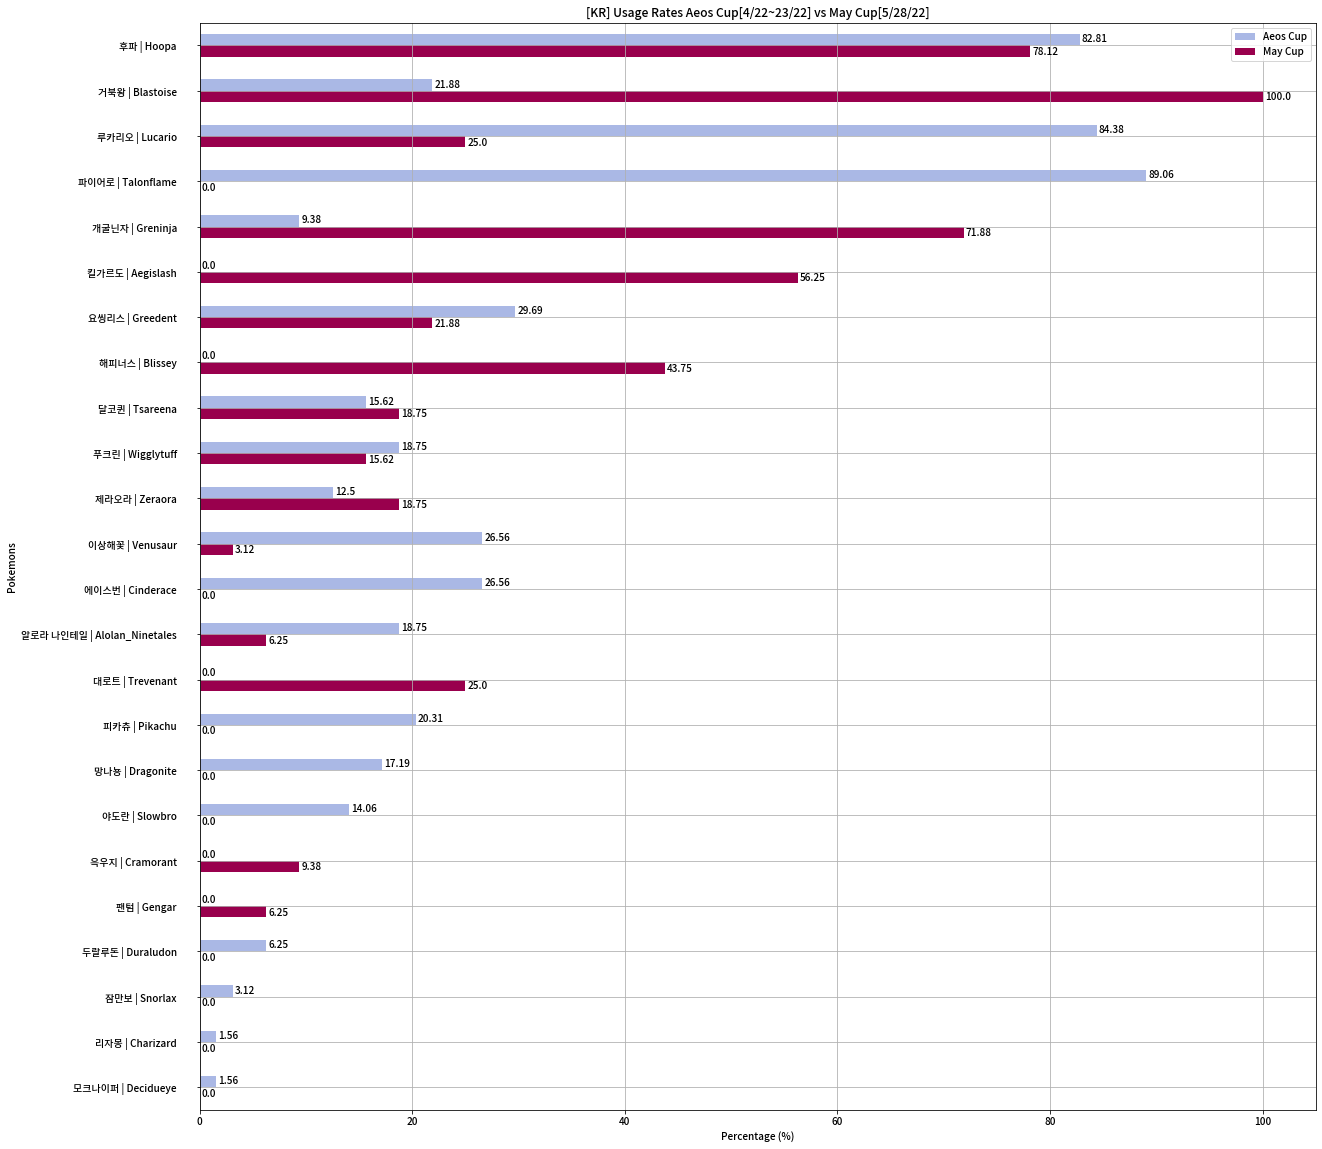

In [10]:
import requests
from io import BytesIO
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

modified_df = combined_df.copy()

from matplotlib import font_manager

font_path = "/usr/share/fonts/truetype/NotoSansCJKkr-Medium.otf" 
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()

def change(poke):
    poke_kr = ALLPOKEMONS_KR[ALLPOKEMONS.index(poke)]
    return f"{poke_kr} | {poke}       "

def offset_image(y, pokemon, ax):
    if pokemon == "Alolan_Ninetales": 
        pokemon = "Ninetales"
    response = requests.get(f"https://static.wikia.nocookie.net/pokemonunite/images/b/bc/P{pokemon}.png/revision/latest/scale-to-width-down/100?cb=20210806135304")
    img = plt.imread(BytesIO(response.content), 0)
    im = OffsetImage(img, zoom=0.35)
    im.image.axes = ax
    x_offset = -25
    x = -30
    ab = AnnotationBbox(im, (0, y), xybox=(x_offset, 0), frameon=False,
                        xycoords='data', boxcoords="offset points", pad=0)
    ax.add_artist(ab)

modified_df["index"] = modified_df["index"].apply(lambda p: change(p))

fig, ax = plt.subplots(1,1)
modified_df.plot(x="index", y=["Usage Rate (%) Aeos", "Usage Rate (%) May"], kind="barh", figsize=(20, 20), ax=ax, color=["#AAB8E5", "#99004d"])
ax.invert_yaxis()
ax.set_ylabel("Pokemons")
ax.set_xlabel("Percentage (%)")
ax.set_title("[KR] Usage Rates Aeos Cup[4/22~23/22] vs May Cup[5/28/22]")

for i, [p, u1, u2, au] in enumerate(modified_df.values):
    ax.text(u1+0.2, i+.2, str(u1), fontsize=10)
    ax.text(u2+0.2, i-.08, str(u2), fontsize=10)
    
# *Displaying Images*
# for i, [p, u1, u2, au] in enumerate(combined_df.values):
#     offset_image(i, p, ax=plt.gca())
    
plt.grid(True)
plt.legend(["Aeos Cup", "May Cup"])